In [1]:
import legend_data_monitor as ldm 

# General LegendDataMonitor functionality

## Set up Geds Subsystem and get data

Set up **Geds** `Subsystem` for given experiment and period (defines channel map and status)

In [110]:

geds = ldm.Subsystem('geds', experiment='L200', period='p02')

\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
\/\ Setting up geds
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
... getting channel map
... getting channel status


The `Subsystem` object knows its channel map and status, and will use it to map channels in data (see below)

In [111]:
geds.channel_map

,channel,name,location,position,status
0,4,V02160A,1,1,On
1,5,V02160B,1,2,On
2,6,V05261B,1,3,On
3,7,V05266A,1,4,On
4,8,V05266B,1,5,On
...,...,...,...,...,...
96,118,P00662A,11,9,On
97,119,P00662B,11,10,On
98,120,P00665B,11,11,Off
99,121,P00748A,11,12,On


Get data for parameters of interest based on given dataset

In [112]:

geds.get_data(['baseline', 'cuspEmax_ctc_cal'], type='phy', path='/data1/users/marshall/prod-ref', version='v06.00', start='2023-01-26 04:30:00', end='2023-01-26 07:00:00')
geds.data

... getting data
...... setting up DataLoader
...... not loading channels with status Off: [26, 33, 46, 47, 48, 50, 84, 85, 94, 105, 112, 116, 120, 122]
...... querying DataLoader (includes quickfix-removed faulty files for r010)
(timestamp >= '20230126T043000Z') and (timestamp <= '20230126T070000Z') and ((type == 'phy')) and (timestamp != '20230125T222013Z') and (timestamp != '20230126T015308Z')


Building entry list: 100%|██████████| 3/3 [00:03<00:00,  1.05s/ keys, key=20230126T063722Z]  


Total time to load data: 0:00:09.654578
... mapping to name and string/fiber position


,channel,cuspEmax_ctc_cal,baseline,datetime,name,location,position,status
0,4,NaN,15027,2023-01-26 05:48:49.261568768+00:00,V02160A,1,1,On
1,4,NaN,15027,2023-01-26 05:48:49.261704960+00:00,V02160A,1,1,On
2,4,0.067562,15027,2023-01-26 05:48:49.261851648+00:00,V02160A,1,1,On
3,4,NaN,15028,2023-01-26 05:48:49.261987584+00:00,V02160A,1,1,On
4,4,NaN,15027,2023-01-26 05:48:50.006174208+00:00,V02160A,1,1,On
...,...,...,...,...,...,...,...,...
591160,121,2.006867,15048,2023-01-26 08:48:53.627375104+00:00,P00748A,11,12,On
591161,121,NaN,14921,2023-01-26 08:48:56.438274816+00:00,P00748A,11,12,On
591162,121,2.766081,14999,2023-01-26 08:48:56.832871680+00:00,P00748A,11,12,On
591163,121,NaN,15000,2023-01-26 08:48:56.833009152+00:00,P00748A,11,12,On


## Flag pulser events

In [113]:
# set up Pulser Subsystem
pulser = ldm.Subsystem('pulser', experiment='L200', period='p02')
# get general Pulser data with pulser event flag corresponding to the same dataset 
pulser.get_data(type='phy', path='/data1/users/marshall/prod-ref', version='v06.00', start='2023-01-26 04:30:00', end='2023-01-26 07:00:00')
pulser.data


\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
\/\ Setting up pulser
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
... getting channel map
... getting channel status
... getting data
...... setting up DataLoader
...... not loading channels with status Off: []
...... querying DataLoader (includes quickfix-removed faulty files for r010)
(timestamp >= '20230126T043000Z') and (timestamp <= '20230126T070000Z') and ((type == 'phy')) and (timestamp != '20230125T222013Z') and (timestamp != '20230126T015308Z')


Building entry list: 100%|██████████| 3/3 [00:00<00:00, 52.27 keys/s, key=20230126T063722Z]  

Total time to load data: 0:00:00.125378
... mapping to name and string/fiber position
... flagging pulser events


,datetime,channel,baseline,wf_max,name,location,position,status,flag_pulser
0,2023-01-26 05:48:49.261568768+00:00,1,14997,15005.166992,AUX01,0,0,On,False
1,2023-01-26 05:48:49.261704960+00:00,1,14999,15004.500000,AUX01,0,0,On,False
2,2023-01-26 05:48:49.261851648+00:00,1,14998,15002.500000,AUX01,0,0,On,False
3,2023-01-26 05:48:49.261987584+00:00,1,14998,15002.833008,AUX01,0,0,On,False
4,2023-01-26 05:48:50.006174208+00:00,1,14991,14996.333984,AUX01,0,0,On,False
...,...,...,...,...,...,...,...,...,...
6790,2023-01-26 08:48:53.627375104+00:00,1,14994,15000.666992,AUX01,0,0,On,False
6791,2023-01-26 08:48:56.438274816+00:00,1,14995,15006.166992,AUX01,0,0,On,False
6792,2023-01-26 08:48:56.832871680+00:00,1,14988,14995.167969,AUX01,0,0,On,False
6793,2023-01-26 08:48:56.833009152+00:00,1,14990,14995.333008,AUX01,0,0,On,False


In [114]:
# flag pulser events in Geds data
geds.flag_pulser_events(pulser)
geds.data

... flagging pulser events


,datetime,channel,cuspEmax_ctc_cal,baseline,name,location,position,status,flag_pulser
0,2023-01-26 05:48:49.261568768+00:00,4,NaN,15027,V02160A,1,1,On,False
1,2023-01-26 05:48:49.261704960+00:00,4,NaN,15027,V02160A,1,1,On,False
2,2023-01-26 05:48:49.261851648+00:00,4,0.067562,15027,V02160A,1,1,On,False
3,2023-01-26 05:48:49.261987584+00:00,4,NaN,15028,V02160A,1,1,On,False
4,2023-01-26 05:48:50.006174208+00:00,4,NaN,15027,V02160A,1,1,On,False
...,...,...,...,...,...,...,...,...,...
591160,2023-01-26 08:48:53.627375104+00:00,121,2.006867,15048,P00748A,11,12,On,False
591161,2023-01-26 08:48:56.438274816+00:00,121,NaN,14921,P00748A,11,12,On,False
591162,2023-01-26 08:48:56.832871680+00:00,121,2.766081,14999,P00748A,11,12,On,False
591163,2023-01-26 08:48:56.833009152+00:00,121,NaN,15000,P00748A,11,12,On,False


It looks like all of them are flagged `False`, but that's because most of the events are not pulser
Let's check if there are events with `True`

In [115]:

geds.data['flag_pulser'].unique()

array([False,  True])

In [116]:
# now you can select only pulser events
geds.data[ geds.data['flag_pulser'] ]

,datetime,channel,cuspEmax_ctc_cal,baseline,name,location,position,status,flag_pulser
45,2023-01-26 05:49:46.769828352+00:00,4,142.566726,15035,V02160A,1,1,On,True
87,2023-01-26 05:50:46.765914368+00:00,4,142.384141,15026,V02160A,1,1,On,True
124,2023-01-26 05:51:46.762006528+00:00,4,141.674071,15037,V02160A,1,1,On,True
166,2023-01-26 05:52:46.758163456+00:00,4,142.004108,15036,V02160A,1,1,On,True
193,2023-01-26 05:53:46.754257408+00:00,4,141.995966,15020,V02160A,1,1,On,True
...,...,...,...,...,...,...,...,...,...
590971,2023-01-26 08:43:59.734482176+00:00,121,274.391533,14947,P00748A,11,12,On,True
591014,2023-01-26 08:44:59.730729216+00:00,121,274.830829,14929,P00748A,11,12,On,True
591050,2023-01-26 08:45:59.785624576+00:00,121,276.186927,14945,P00748A,11,12,On,True
591094,2023-01-26 08:46:59.781625600+00:00,121,275.708795,14976,P00748A,11,12,On,True


In [117]:
# or only non-pulser i.e. physical events
geds.data[ ~geds.data['flag_pulser'] ]

,datetime,channel,cuspEmax_ctc_cal,baseline,name,location,position,status,flag_pulser
0,2023-01-26 05:48:49.261568768+00:00,4,NaN,15027,V02160A,1,1,On,False
1,2023-01-26 05:48:49.261704960+00:00,4,NaN,15027,V02160A,1,1,On,False
2,2023-01-26 05:48:49.261851648+00:00,4,0.067562,15027,V02160A,1,1,On,False
3,2023-01-26 05:48:49.261987584+00:00,4,NaN,15028,V02160A,1,1,On,False
4,2023-01-26 05:48:50.006174208+00:00,4,NaN,15027,V02160A,1,1,On,False
...,...,...,...,...,...,...,...,...,...
591160,2023-01-26 08:48:53.627375104+00:00,121,2.006867,15048,P00748A,11,12,On,False
591161,2023-01-26 08:48:56.438274816+00:00,121,NaN,14921,P00748A,11,12,On,False
591162,2023-01-26 08:48:56.832871680+00:00,121,2.766081,14999,P00748A,11,12,On,False
591163,2023-01-26 08:48:56.833009152+00:00,121,NaN,15000,P00748A,11,12,On,False


## Analysis Data examples

### Geds `cuspEmax_ctc_cal` in physical events

In [118]:

data1 = ldm.AnalysisData(geds.data, parameters='cuspEmax_ctc_cal', event_type='phy')
data1.data

=== Setting up Analysis Data
... keeping only physical (non-pulser) events
... getting channel mean


,channel,cuspEmax_ctc_cal,datetime,flag_pulser,location,name,position,status,cuspEmax_ctc_cal_mean
0,4,NaN,2023-01-26 05:48:49.261568768+00:00,False,1,V02160A,1,On,1.611530
1,4,NaN,2023-01-26 05:48:49.261704960+00:00,False,1,V02160A,1,On,1.611530
2,4,0.067562,2023-01-26 05:48:49.261851648+00:00,False,1,V02160A,1,On,1.611530
3,4,NaN,2023-01-26 05:48:49.261987584+00:00,False,1,V02160A,1,On,1.611530
4,4,NaN,2023-01-26 05:48:50.006174208+00:00,False,1,V02160A,1,On,1.611530
...,...,...,...,...,...,...,...,...,...
575761,121,2.006867,2023-01-26 08:48:53.627375104+00:00,False,11,P00748A,12,On,2.775576
575762,121,NaN,2023-01-26 08:48:56.438274816+00:00,False,11,P00748A,12,On,2.775576
575763,121,2.766081,2023-01-26 08:48:56.832871680+00:00,False,11,P00748A,12,On,2.775576
575764,121,NaN,2023-01-26 08:48:56.833009152+00:00,False,11,P00748A,12,On,2.775576


The `cuspEmax_ctc_cal_mean` column is already there for LegendDataMonitor plotting purposes.

The value is repeated for each channel, and was obtained via:

In [119]:
data1.data.groupby('channel').mean(numeric_only=True)['cuspEmax_ctc_cal']

channel
4      1.611530
5      1.800142
6      1.904300
7      3.032862
8      1.470385
         ...   
114    0.925155
115    1.405578
118    1.216238
119    0.446509
121    2.775576
Name: cuspEmax_ctc_cal, Length: 87, dtype: float64

You can also group by detector name if that's convenient

In [120]:
data1.data.groupby('name').mean(numeric_only=True)['cuspEmax_ctc_cal']

name
B00000A    0.929728
B00000B    1.006704
B00000C    0.873733
B00000D    2.392457
B00002A    1.467921
             ...   
V08682A    4.976539
V08682B    1.966862
V09372A    5.519405
V09374A    3.317214
V09724A    1.929672
Name: cuspEmax_ctc_cal, Length: 87, dtype: float64

<AxesSubplot: xlabel='name'>

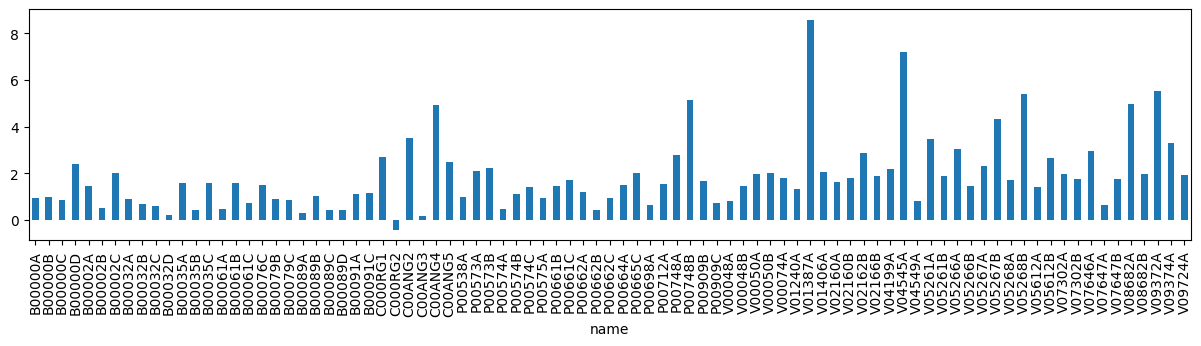

In [121]:
data1.data.groupby('name').mean(numeric_only=True)['cuspEmax_ctc_cal'].plot.bar(figsize=(15,3))

Let's look at the energy distribution for a specific detector

Text(0.5, 1.0, 'V08682A')

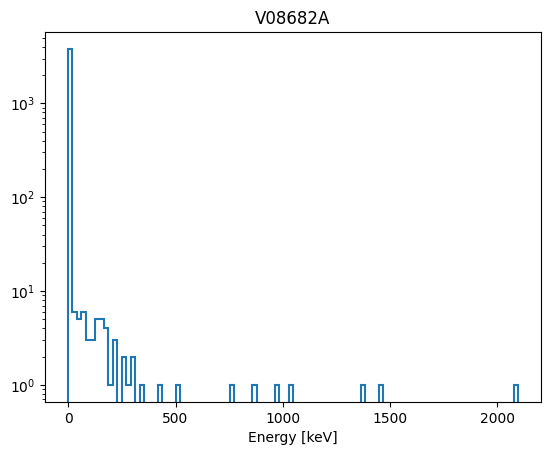

In [122]:

ax = data1.data[ data1.data['name'] == 'V08682A']['cuspEmax_ctc_cal'].plot.hist(histtype='step', linewidth=1.5, bins=100, log=True)
# for some reason xlabel=... in .plot.hist() does not work
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('')
ax.set_title('V08682A')

### Geds `baseline` variation in pulser events

In [123]:
# % variation from the mean of Geds baselines in pulser events
data2 = ldm.AnalysisData(geds.data, parameters='baseline', event_type='pulser', variation=True)
# now the baseline column shows %, while the mean column is preserved
data2.data

=== Setting up Analysis Data
... keeping only pulser events
... getting channel mean
... calculating % variation from the mean


,channel,baseline,datetime,flag_pulser,location,name,position,status,baseline_mean
0,4,0.044210,2023-01-26 05:49:46.769828352+00:00,True,1,V02160A,1,On,15028.355932
1,4,-0.015677,2023-01-26 05:50:46.765914368+00:00,True,1,V02160A,1,On,15028.355932
2,4,0.057518,2023-01-26 05:51:46.762006528+00:00,True,1,V02160A,1,On,15028.355932
3,4,0.050864,2023-01-26 05:52:46.758163456+00:00,True,1,V02160A,1,On,15028.355932
4,4,-0.055601,2023-01-26 05:53:46.754257408+00:00,True,1,V02160A,1,On,15028.355932
...,...,...,...,...,...,...,...,...,...
15394,121,-0.260619,2023-01-26 08:43:59.734482176+00:00,True,11,P00748A,12,On,14986.056497
15395,121,-0.380731,2023-01-26 08:44:59.730729216+00:00,True,11,P00748A,12,On,14986.056497
15396,121,-0.273965,2023-01-26 08:45:59.785624576+00:00,True,11,P00748A,12,On,14986.056497
15397,121,-0.067106,2023-01-26 08:46:59.781625600+00:00,True,11,P00748A,12,On,14986.056497


Let's look at the variation trend in time for two specific detectors

name
P00661C    AxesSubplot(0.125,0.2;0.775x0.68)
V08682A    AxesSubplot(0.125,0.2;0.775x0.68)
Name: baseline, dtype: object

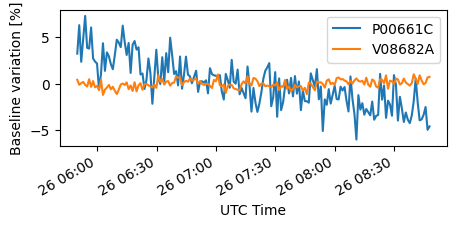

In [124]:

# select data from 2 specific detectors
data2_two_detectors = data2.data[ data2.data['name'].isin(['V08682A', 'P00661C']) ]
# set index to datetime -> will be automaticlly plotted on the x-axis
data2_two_detectors.set_index('datetime').groupby('name')['baseline'].plot(legend=True, sharex=True, figsize=(5,2),
    xlabel='UTC Time', ylabel='Baseline variation [%]')

I don't like how the x-axis tick labels looks like - we can use `DateFormatter` from `matplotlib.dates`  to fix ut

But it only works with `datetime.datetime` type x-axis, while our `'datetime'` column is of type `Timestamp` specific to `pandas`
-> plot through `matplotlib.pyplot` converting to `datetime.datetime` with `.dt.to_pydatetime()`
Note: if you convert and put it back in the `DataFrame` column like this:
```python
data2_2dets['datetime'] = data2_2dets['datetime].dt.to_pydatetime()
```
it will still be of type `Timestamp` and will not work with `DateFormatter`. Believe me, I tried.

In [125]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

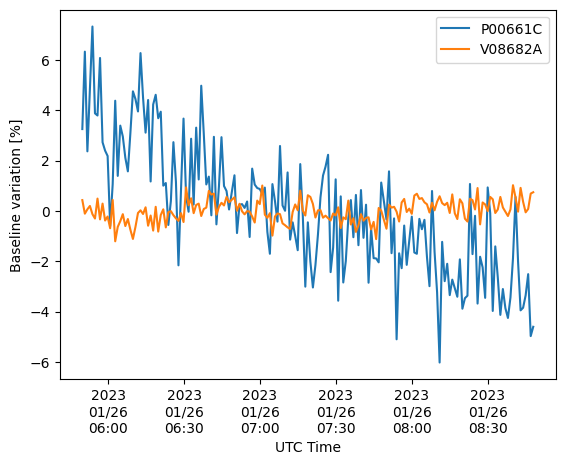

In [126]:
fig, ax = plt.subplots()
for det_name, det_data in data2_two_detectors.groupby('name'):
    plt.plot(det_data['datetime'].dt.to_pydatetime(), det_data['baseline'], label=det_name)

ax.set_xlabel('UTC Time')
ax.set_ylabel('Baseline variation [%]')
ax.legend()

ax.xaxis.set_major_formatter(DateFormatter('%Y\n%m/%d\n%H:%M'))

### Pulser event rate

In [127]:
# M - months, D - days, H - hours, T - minutes
data3 = ldm.AnalysisData(pulser.data, parameters='event_rate', time_window='10T', event_type='pulser')
data3.data

=== Setting up Analysis Data
... keeping only pulser events
... getting channel mean


,channel,datetime,event_rate,name,location,position,event_rate_mean
0,1,2023-01-26 05:54:46.769828352+00:00,0.018333,AUX01,0,0,0.016471
1,1,2023-01-26 06:04:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
2,1,2023-01-26 06:14:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
3,1,2023-01-26 06:24:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
4,1,2023-01-26 06:34:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
5,1,2023-01-26 06:44:46.769828352+00:00,0.013333,AUX01,0,0,0.016471
6,1,2023-01-26 06:54:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
7,1,2023-01-26 07:04:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
8,1,2023-01-26 07:14:46.769828352+00:00,0.016667,AUX01,0,0,0.016471
9,1,2023-01-26 07:24:46.769828352+00:00,0.016667,AUX01,0,0,0.016471


Text(0.5, 1.0, 'Pulser event rate in AUX001')

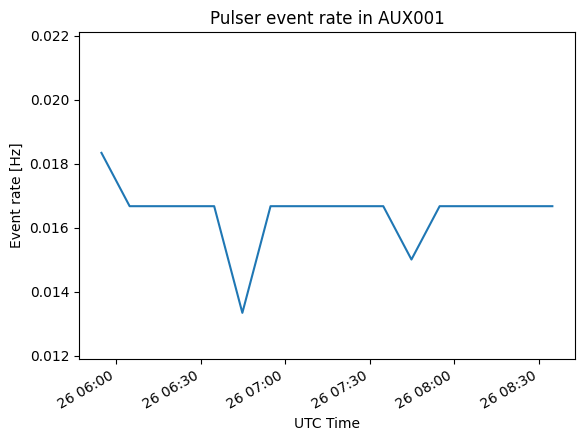

In [128]:
ax = data3.data.plot(x = 'datetime', y = 'event_rate', legend=False)
# expected rate 1/60s ~= 0.017 Hz
# set limits to +- 30%
ax.set_ylim([0.017*0.7, 0.017*1.3])
ax.set_ylabel('Event rate [Hz]')
ax.set_xlabel('UTC Time')
ax.set_title('Pulser event rate in AUX001')

# Funcionality using dict/json

Instead of using arguments experiment=..., period=... etc., you can give them to the functions as a dict.

This can be convenient if you want to set up a config from which to read, to remember what settings you used later (much like it's being done for LegendDataMonitor plots, see below)

## Separate configs

In [132]:
setup = {'experiment': 'L200', 'period': 'p02'}

In [133]:
geds1 = ldm.subsystem.Subsystem('geds', setup=setup)

\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
\/\ Setting up geds
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
... getting channel map
... getting channel status


In [135]:
dataset = {
    'type':'phy',
    'path':'/data1/users/marshall/prod-ref',
    'version': 'v06.00',
    'selection': {
        'start': '2023-01-26 04:30:00',
        'end': '2023-01-26 07:00:00'
        }
}

In [137]:
geds1.get_data('baseline', dataset=dataset)
geds1.data

... getting data
...... setting up DataLoader
...... not loading channels with status Off: [26, 33, 46, 47, 48, 50, 84, 85, 94, 105, 112, 116, 120, 122]
...... querying DataLoader (includes quickfix-removed faulty files for r010)
(timestamp >= '20230126T043000Z') and (timestamp <= '20230126T070000Z') and ((type == 'phy')) and (timestamp != '20230125T222013Z') and (timestamp != '20230126T015308Z')


Building entry list: 100%|██████████| 3/3 [00:09<00:00,  3.10s/ keys, key=20230126T063722Z]


Total time to load data: 0:00:14.341601
... mapping to name and string/fiber position


,channel,baseline,datetime,name,location,position,status
0,4,15027,2023-01-26 05:48:49.261568768+00:00,V02160A,1,1,On
1,4,15027,2023-01-26 05:48:49.261704960+00:00,V02160A,1,1,On
2,4,15027,2023-01-26 05:48:49.261851648+00:00,V02160A,1,1,On
3,4,15028,2023-01-26 05:48:49.261987584+00:00,V02160A,1,1,On
4,4,15027,2023-01-26 05:48:50.006174208+00:00,V02160A,1,1,On
...,...,...,...,...,...,...,...
591160,121,15048,2023-01-26 08:48:53.627375104+00:00,P00748A,11,12,On
591161,121,14921,2023-01-26 08:48:56.438274816+00:00,P00748A,11,12,On
591162,121,14999,2023-01-26 08:48:56.832871680+00:00,P00748A,11,12,On
591163,121,15000,2023-01-26 08:48:56.833009152+00:00,P00748A,11,12,On


In [145]:
selection = {
    'parameters': 'event_rate',
    'event_type': 'all',
    'time_window': '10T'
}

In [146]:
data4 = ldm.AnalysisData(geds1.data, selection=selection)
data4.data

=== Setting up Analysis Data
... keeping all (pulser + non-pulser) events
... getting channel mean


,channel,datetime,event_rate,name,location,position,event_rate_mean
0,4,2023-01-26 05:53:49.261568768+00:00,0.666667,V02160A,1,1,0.596053
1,4,2023-01-26 06:03:49.261568768+00:00,0.653333,V02160A,1,1,0.596053
2,4,2023-01-26 06:13:49.261568768+00:00,0.630000,V02160A,1,1,0.596053
3,4,2023-01-26 06:23:49.261568768+00:00,0.586667,V02160A,1,1,0.596053
4,4,2023-01-26 06:33:49.261568768+00:00,0.643333,V02160A,1,1,0.596053
...,...,...,...,...,...,...,...
1647,121,2023-01-26 08:03:49.261568768+00:00,0.656667,P00748A,11,12,0.628704
1648,121,2023-01-26 08:13:49.261568768+00:00,0.643333,P00748A,11,12,0.628704
1649,121,2023-01-26 08:23:49.261568768+00:00,0.560000,P00748A,11,12,0.628704
1650,121,2023-01-26 08:33:49.261568768+00:00,0.615000,P00748A,11,12,0.628704


## Combined config example 1

In [154]:
config1 ={
    'setup': {
        'experiment': 'L200',
        'period': 'p02'
        },
    'dataset': {
        'type':'phy',
        'path':'/data1/users/marshall/prod-ref',
        'version': 'v06.00',
        'selection': {
            'start': '2023-01-26 04:30:00',
            'end': '2023-01-26 07:00:00'
        }
    },
    'analysis': {
        'parameters': 'event_rate',
        'event_type': 'all',
        'time_window': '10T'
    }
}

In [155]:
geds2 = ldm.subsystem.Subsystem('geds', setup=config1['setup'])
geds2.get_data('baseline', dataset=config1['dataset'])
data5 = ldm.AnalysisData(geds2.data, selection=config1['analysis'])
data5.data

\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
\/\ Setting up geds
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
... getting channel map
... getting channel status
... getting data
...... setting up DataLoader
...... not loading channels with status Off: [26, 33, 46, 47, 48, 50, 84, 85, 94, 105, 112, 116, 120, 122]
...... querying DataLoader (includes quickfix-removed faulty files for r010)
(timestamp >= '20230126T043000Z') and (timestamp <= '20230126T070000Z') and ((type == 'phy')) and (timestamp != '20230125T222013Z') and (timestamp != '20230126T015308Z')







Building entry list: 100%|██████████| 3/3 [00:07<00:00,  2.60s/ keys, key=20230126T063722Z]


Total time to load data: 0:00:12.942079
... mapping to name and string/fiber position
=== Setting up Analysis Data
... keeping all (pulser + non-pulser) events
... getting channel mean


,channel,datetime,event_rate,name,location,position,event_rate_mean
0,4,2023-01-26 05:53:49.261568768+00:00,0.666667,V02160A,1,1,0.596053
1,4,2023-01-26 06:03:49.261568768+00:00,0.653333,V02160A,1,1,0.596053
2,4,2023-01-26 06:13:49.261568768+00:00,0.630000,V02160A,1,1,0.596053
3,4,2023-01-26 06:23:49.261568768+00:00,0.586667,V02160A,1,1,0.596053
4,4,2023-01-26 06:33:49.261568768+00:00,0.643333,V02160A,1,1,0.596053
...,...,...,...,...,...,...,...
1647,121,2023-01-26 08:03:49.261568768+00:00,0.656667,P00748A,11,12,0.628704
1648,121,2023-01-26 08:13:49.261568768+00:00,0.643333,P00748A,11,12,0.628704
1649,121,2023-01-26 08:23:49.261568768+00:00,0.560000,P00748A,11,12,0.628704
1650,121,2023-01-26 08:33:49.261568768+00:00,0.615000,P00748A,11,12,0.628704


## Combined config example 2

In [157]:
config2 ={
    'experiment': 'L200',
    'period': 'p02',   
    'type':'phy',
    'path':'/data1/users/marshall/prod-ref',
    'version': 'v06.00',
    'selection': {
        'start': '2023-01-26 04:30:00',
        'end': '2023-01-26 07:00:00'
    },
    'parameters': 'event_rate',
    'event_type': 'all',
    'time_window': '10T'
}

In [159]:
geds3 = ldm.subsystem.Subsystem('geds', setup=config2)
geds2.get_data('baseline', dataset=config2)
data5 = ldm.AnalysisData(geds2.data, selection=config2)
data5.data

\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
\/\ Setting up geds
\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\/
... getting channel map
... getting channel status
... getting data
...... setting up DataLoader
...... not loading channels with status Off: [26, 33, 46, 47, 48, 50, 84, 85, 94, 105, 112, 116, 120, 122]
...... querying DataLoader (includes quickfix-removed faulty files for r010)
(timestamp >= '20230126T043000Z') and (timestamp <= '20230126T070000Z') and ((type == 'phy')) and (timestamp != '20230125T222013Z') and (timestamp != '20230126T015308Z')







Building entry list: 100%|██████████| 3/3 [00:07<00:00,  2.53s/ keys, key=20230126T063722Z]


Total time to load data: 0:00:12.719756
... mapping to name and string/fiber position
=== Setting up Analysis Data
... keeping all (pulser + non-pulser) events
... getting channel mean


,channel,datetime,event_rate,name,location,position,event_rate_mean
0,4,2023-01-26 05:53:49.261568768+00:00,0.666667,V02160A,1,1,0.596053
1,4,2023-01-26 06:03:49.261568768+00:00,0.653333,V02160A,1,1,0.596053
2,4,2023-01-26 06:13:49.261568768+00:00,0.630000,V02160A,1,1,0.596053
3,4,2023-01-26 06:23:49.261568768+00:00,0.586667,V02160A,1,1,0.596053
4,4,2023-01-26 06:33:49.261568768+00:00,0.643333,V02160A,1,1,0.596053
...,...,...,...,...,...,...,...
1647,121,2023-01-26 08:03:49.261568768+00:00,0.656667,P00748A,11,12,0.628704
1648,121,2023-01-26 08:13:49.261568768+00:00,0.643333,P00748A,11,12,0.628704
1649,121,2023-01-26 08:23:49.261568768+00:00,0.560000,P00748A,11,12,0.628704
1650,121,2023-01-26 08:33:49.261568768+00:00,0.615000,P00748A,11,12,0.628704


# LegendDataMonitor plots

In [2]:
user_config = 'user_config_example_L200.json'

{'output': '/data1/users/redchuk/data_monitor/dm_out', 'dataset': {'experiment': 'L200', 'period': 'p02', 'version': 'v06.00', 'path': '/data1/users/marshall/prod-ref', 'type': 'phy', 'selection': {'start': '2023-01-26 04:30:00', 'end': '2023-01-26 07:00:00'}}, 'subsystems': {'pulser': {'Pulser event rate': {'parameters': 'event_rate', 'event_type': 'pulser', 'plot_structure': 'per channel', 'plot_style': 'vs time', 'variation': False, 'time_window': '10T'}, 'AUX channel waveform maximum': {'parameters': 'wf_max', 'event_type': 'all', 'plot_structure': 'per channel', 'plot_style': 'histogram', 'variation': False}}, 'geds': {'Baselines in pulser events': {'parameters': 'baseline', 'event_type': 'pulser', 'plot_structure': 'per channel', 'plot_style': 'vs time', 'variation': True, 'time_window': '30T'}}}}
----------------------------------------------------
--- Setting up plotting
----------------------------------------------------
Output directory /data1/users/redchuk/data_monitor/dm_o

Building entry list: 100%|██████████| 3/3 [00:00<00:00, 48.89 keys/s, key=20230126T063722Z]  

Total time to load data: 0:00:00.137552
... mapping to name and string/fiber position
... flagging pulser events
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~ P L O T T I N G  Pulser event rate
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
=== Setting up Analysis Data
... keeping only pulser events
... getting channel mean
Plot structure: per channel
Plot style: vs time
... aux 0
...... position 0


KeyError: "['mean'] not in index"

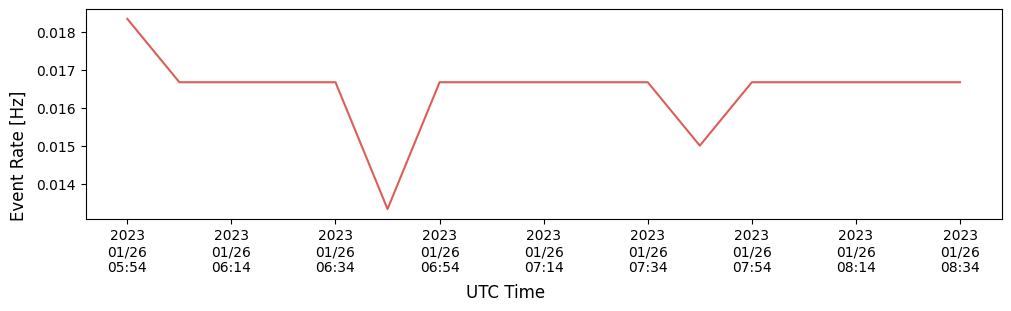

In [3]:
ldm.control_plots(user_config)